#Regression Analysis.

In [2]:
#Importing all the Inbuilt Libraries.
from sklearn import datasets;
from sklearn import linear_model;
from sklearn import metrics;
from sklearn import model_selection;

#Importing the Other pre-defined Libraries.
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

#Imorting the Values of the Datasets.
path='/content/Ecommerce Customers.csv';
data=pd.read_csv(path);

#Showing the Values of the Data.
print("\n 1. Values of the Data: ",data);
print("\n---------------------------------");
print("\n 2. Feature Values: ",data.columns);


 1. Values of the Data:                               Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ...       

In [4]:
#Printing and showing the values of the data information and descriptions.
print(data.info);
print("\n--------------------");
print(data.describe());

<bound method DataFrame.info of                              Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ... 

In [6]:
#Now, we need to convert the data it into the DataFrames.
features_names=data.columns;
dfDfd=pd.DataFrame(data=data,columns=features_names);
dfDfd.head();

In [8]:
#Now, we need to calculate the coorelation Matrix.
cor1=dfDfd.select_dtypes(include=['float', 'int']).corr() # Select only numerical columns
print(cor1)

                      Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   
Yearly Amount Spent              0.355088     0.499328        -0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                  -0.047582            -0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000  


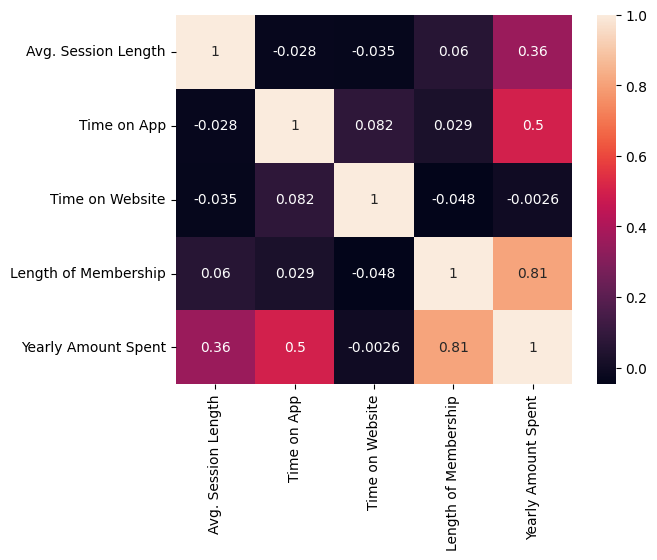

In [9]:
#Coorelation Matrix has been done.
#Now, we have to visualise the values of the matrix.
import seaborn as sns;
import matplotlib.pyplot as plt;
plt.figure(1);
sns.heatmap(cor1,annot=True);
plt.show();

In [24]:
#Now, we need to train the model and make the Linear Regression Model.
#Take 'BMI' as Dependent Variable and 's6' is the Independent Variable.
X=dfDfd['Yearly Amount Spent'].values; #Independent Variable.
y=dfDfd['Avg. Session Length'].values;  #Dependent Variable.

#If the Single Independent Variable is Considered.
X=X.reshape(-1,1);
#Now, we have to split it into training and testing phases.
ratio=0.3;
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=ratio,random_state=7);
print(Xtrain.shape,ytrain.shape);
print(Xtest.shape,ytest.shape);

(350, 1) (350,)
(150, 1) (150,)


In [27]:
#Now, creating the values of the Linear_Models.
lnModel=linear_model.LinearRegression();
#Now, we have to train the Model.
lmModel=lnModel.fit(Xtrain,ytrain);
#Now, we have to predict the values by using the testing-Training.
ypredTrn = lmModel.predict(Xtrain) # Assign the result of prediction to ypredTrn
#Now, we have to predict the values based on the Testing Phases.
ypredTst = lmModel.predict(Xtest) # Assign the result of prediction to ypredTst
#Metrics.
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

Training r2 value: 0.13091329532573182
Testing r2 value: 0.0854373601441657


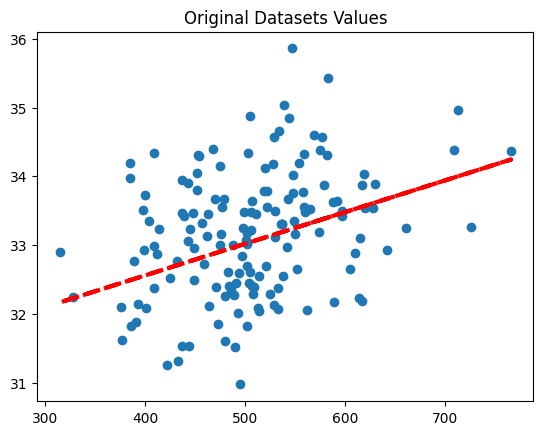

In [28]:
#Now, we have to visualise the values of the Data.
plt.figure(1);
plt.title("Original Datasets Values");
plt.scatter(Xtest,ytest);
plt.plot(Xtest,ypredTst,'--r',linewidth=3);
plt.show();

#----------------------------------- Day-11 (FILE: 2) --------------------------